In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LogisticRegression

# 1.Data Preprocessing

In [47]:
# df = pd.read_csv("/Users/wanglinhan/Desktop/BDMA/UPC/Machine_Learning/projects/diabetes_ml/data/diabetes_14.csv")
df = pd.read_csv("/Users/zzy13/Desktop/Classes_at_UPC/Machine_learning/Project/Github/data/diabetes_14.csv")

df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [48]:
df
df.shape
print((df['CLASS'] == 'N').sum())

102


## 1.1 Deal with duplicates

In [49]:
# if no_pation is the same, other values are the same, leave one
df_drop_1 = df.drop_duplicates(subset=['No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG','HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'])
# if no_pation is the same, other values are not the same, delete all
df_drop_2 = df.drop_duplicates(subset=['No_Pation'],keep=False)
df_drop_2.reset_index(inplace=True,drop=True)
df_drop_2

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,195,4543,f,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y
935,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
936,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
937,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


## 1.2 Boxplot

/Users/zzy13/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zzy13/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zzy13/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/zzy13/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

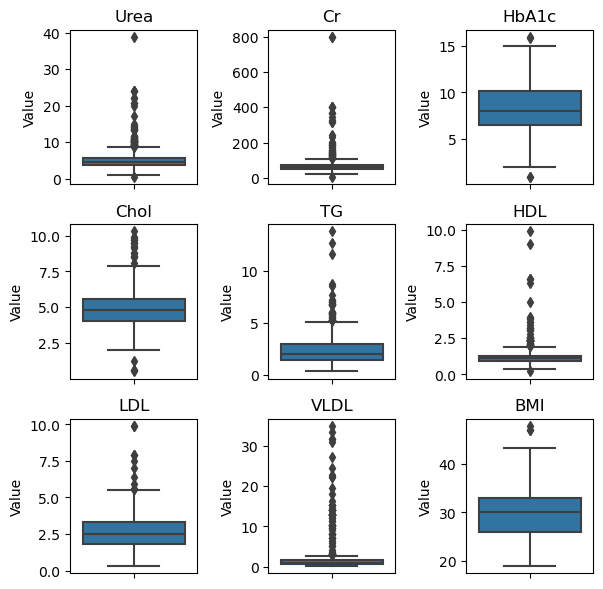

In [50]:
selected_df = df_drop_2[['Urea', 'Cr', 'HbA1c', 'Chol', 'TG','HDL', 'LDL', 'VLDL', 'BMI']]

# Set up the figure and axis
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))

axes = axes.flatten()
# Loop through each column and create a boxplot
for i, col in enumerate(selected_df.columns):
    sns.boxplot(y=selected_df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## 1.3 Remove outlier by std
set threshold = 5

In [51]:
# Loop through each column and remove outliers based on standard deviation
indexs = []
for col in ['Urea', 'Cr', 'HbA1c', 'Chol', 'TG','HDL', 'LDL', 'VLDL', 'BMI']:
    mean = df_drop_2[col].mean()
    std_dev = df_drop_2[col].std()
    
    # Define the threshold for outliers
    threshold = 5  # You can adjust this threshold as needed
    
    # Calculate the lower and upper bounds
    lower_bound = mean - threshold * std_dev
    upper_bound = mean + threshold * std_dev
    
    # Remove outliers
    # index = (df_drop_2[col] >= lower_bound) & (df_drop_2[col] <= upper_bound)
    # indexs.append(index)
    df_drop_2 = df_drop_2[(df_drop_2[col] >= lower_bound) & (df_drop_2[col] <= upper_bound)]

# Now df contains the DataFrame with outliers removed using the standard deviation method
df_drop_2.reset_index(inplace=True, drop=True)
df_drop_2

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,195,4543,f,55,4.1,34,13.9,5.4,1.6,1.6,3.1,0.7,33.0,Y
898,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
899,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
900,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


## 1.4 Violin plot after removing outliers

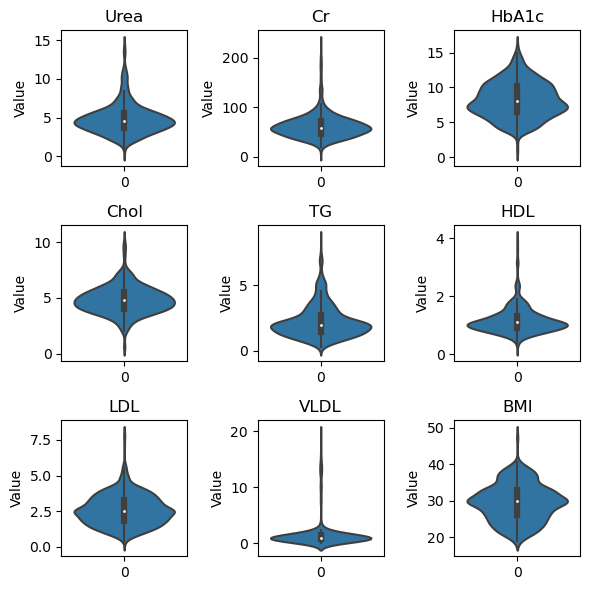

In [52]:
selected_df = df_drop_2[['Urea', 'Cr', 'HbA1c', 'Chol', 'TG','HDL', 'LDL', 'VLDL', 'BMI']]

# Set up the figure and axis
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))

axes = axes.flatten()
# Loop through each column and create a boxplot
for i, col in enumerate(selected_df.columns):
    sns.violinplot(data=selected_df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('Value')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [53]:
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

## 1.5 Standardization

In [54]:
# Assuming df is your DataFrame containing the data

# Select only the numerical columns
numerical_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG','HDL', 'LDL', 'VLDL', 'BMI']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
df_standardized = df_drop_2.copy()  # Create a copy of the original DataFrame
df_standardized[numerical_cols] = scaler.fit_transform(df_drop_2[numerical_cols])
df_standardized

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,-0.372449,-0.075748,-0.677683,-1.320826,-0.500999,-1.100396,2.704556,-1.120634,-0.425626,-1.102331,N
1,735,34221,M,-3.121433,-0.178274,-0.013078,-1.320826,-0.901621,-0.695835,-0.156961,-0.462853,-0.386427,-1.302996,N
2,420,47975,F,-0.372449,-0.075748,-0.677683,-1.320826,-0.500999,-1.100396,2.704556,-1.120634,-0.425626,-1.102331,N
3,680,87656,F,-0.372449,-0.075748,-0.677683,-1.320826,-0.500999,-1.100396,2.704556,-1.120634,-0.425626,-1.102331,N
4,504,34223,M,-2.319646,1.154566,-0.677683,-1.320826,0.059871,-1.019484,-0.817311,-0.556822,-0.464825,-1.704326,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,195,4543,f,0.200256,-0.383327,-1.176137,2.223322,0.460493,-0.534011,0.943622,0.476834,-0.347228,0.703653,Y
898,200,454317,M,2.032912,3.153826,1.440745,-0.493858,2.143104,-0.453099,0.063155,-0.744759,-0.386427,0.101658,Y
899,671,876534,M,-2.548728,-0.947221,-0.096154,1.593252,-0.581124,-0.048538,-1.037428,-0.180947,5.415021,1.546446,Y
900,99,24004,M,-1.746941,0.488146,-0.137692,-0.611997,0.380369,-0.210363,0.943622,0.288896,4.866235,2.208640,Y


## 1.6 Delete p, gender class 0-1

In [55]:
df_binary = df_standardized[(df_standardized["CLASS"]!="P")]
df_binary 
# df_binary = df_standardized

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,-0.372449,-0.075748,-0.677683,-1.320826,-0.500999,-1.100396,2.704556,-1.120634,-0.425626,-1.102331,N
1,735,34221,M,-3.121433,-0.178274,-0.013078,-1.320826,-0.901621,-0.695835,-0.156961,-0.462853,-0.386427,-1.302996,N
2,420,47975,F,-0.372449,-0.075748,-0.677683,-1.320826,-0.500999,-1.100396,2.704556,-1.120634,-0.425626,-1.102331,N
3,680,87656,F,-0.372449,-0.075748,-0.677683,-1.320826,-0.500999,-1.100396,2.704556,-1.120634,-0.425626,-1.102331,N
4,504,34223,M,-2.319646,1.154566,-0.677683,-1.320826,0.059871,-1.019484,-0.817311,-0.556822,-0.464825,-1.704326,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,195,4543,f,0.200256,-0.383327,-1.176137,2.223322,0.460493,-0.534011,0.943622,0.476834,-0.347228,0.703653,Y
898,200,454317,M,2.032912,3.153826,1.440745,-0.493858,2.143104,-0.453099,0.063155,-0.744759,-0.386427,0.101658,Y
899,671,876534,M,-2.548728,-0.947221,-0.096154,1.593252,-0.581124,-0.048538,-1.037428,-0.180947,5.415021,1.546446,Y
900,99,24004,M,-1.746941,0.488146,-0.137692,-0.611997,0.380369,-0.210363,0.943622,0.288896,4.866235,2.208640,Y


In [56]:
df_binary["Gender"] = df_binary["Gender"].replace({"M":0,"m":0,"F":1,"f":1})
df_binary["CLASS"] = df_binary["CLASS"].replace({"N":0,"Y":1,"Y ":1,"N ":0})
df_cleaned = df_binary
df_cleaned

/var/folders/n4/twvktyqn38z2rzx703mm67pc0000gn/T/ipykernel_15508/1699523948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary["Gender"] = df_binary["Gender"].replace({"M":0,"m":0,"F":1,"f":1})
/var/folders/n4/twvktyqn38z2rzx703mm67pc0000gn/T/ipykernel_15508/1699523948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary["CLASS"] = df_binary["CLASS"].replace({"N":0,"Y":1,"Y ":1,"N ":0})


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1,-0.372449,-0.075748,-0.677683,-1.320826,-0.500999,-1.100396,2.704556,-1.120634,-0.425626,-1.102331,0
1,735,34221,0,-3.121433,-0.178274,-0.013078,-1.320826,-0.901621,-0.695835,-0.156961,-0.462853,-0.386427,-1.302996,0
2,420,47975,1,-0.372449,-0.075748,-0.677683,-1.320826,-0.500999,-1.100396,2.704556,-1.120634,-0.425626,-1.102331,0
3,680,87656,1,-0.372449,-0.075748,-0.677683,-1.320826,-0.500999,-1.100396,2.704556,-1.120634,-0.425626,-1.102331,0
4,504,34223,0,-2.319646,1.154566,-0.677683,-1.320826,0.059871,-1.019484,-0.817311,-0.556822,-0.464825,-1.704326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,195,4543,1,0.200256,-0.383327,-1.176137,2.223322,0.460493,-0.534011,0.943622,0.476834,-0.347228,0.703653,1
898,200,454317,0,2.032912,3.153826,1.440745,-0.493858,2.143104,-0.453099,0.063155,-0.744759,-0.386427,0.101658,1
899,671,876534,0,-2.548728,-0.947221,-0.096154,1.593252,-0.581124,-0.048538,-1.037428,-0.180947,5.415021,1.546446,1
900,99,24004,0,-1.746941,0.488146,-0.137692,-0.611997,0.380369,-0.210363,0.943622,0.288896,4.866235,2.208640,1


In [57]:
# df_cleaned.to_csv("/Users/wanglinhan/Desktop/BDMA/UPC/Machine_Learning/projects/diabetes_ml/data/df_cleaned.csv")
df_cleaned.to_csv("/Users/zzy13/Desktop/Classes_at_UPC/Machine_learning/Project/Github/data/df_cleaned.csv")

# 2.Feature Selection
Lasso selection: ['HbA1c', 'BMI']

Logistic selection: ['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
       
Ridge selection: ['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

In [38]:
X = df_cleaned[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG','HDL', 'LDL', 'VLDL', 'BMI']]
y = df_cleaned["CLASS"]

In [39]:
lasso = Lasso(alpha=0.1)  # alpha is the regularization parameter
lasso.fit(X, y)

# Print selected features (coefficients not equal to zero)
selected_features_lasso = X.columns[lasso.coef_ != 0]
print("Selected features using Lasso regression:")
print(selected_features_lasso)

Selected features using Lasso regression:
Index(['HbA1c', 'BMI'], dtype='object')


In [ ]:
logistic = LogisticRegression(penalty='l1', solver='liblinear')  # Lasso regression for binary classification
logistic.fit(X, y)
selected_features_logistic = X.columns[logistic.coef_[0] != 0]
print("Selected features using Lasso logistic regression:")
print(selected_features_logistic)

Selected features using Lasso logistic regression:
Index(['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL',
       'BMI'],
      dtype='object')


In [40]:
# Ridge Regression for feature selection
ridge = Ridge(alpha=0.1)  # alpha is the regularization parameter
ridge.fit(X,y)

# Print selected features (coefficients not equal to zero)
selected_features_ridge = X.columns[ridge.coef_ != 0]
print("Selected features using Ridge regression:")
print(selected_features_ridge)

Selected features using Ridge regression:
Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI'],
      dtype='object')


# 3.Visualization: EDA

In [151]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 901
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         850 non-null    int64  
 1   No_Pation  850 non-null    int64  
 2   Gender     850 non-null    int64  
 3   AGE        850 non-null    float64
 4   Urea       850 non-null    float64
 5   Cr         850 non-null    float64
 6   HbA1c      850 non-null    float64
 7   Chol       850 non-null    float64
 8   TG         850 non-null    float64
 9   HDL        850 non-null    float64
 10  LDL        850 non-null    float64
 11  VLDL       850 non-null    float64
 12  BMI        850 non-null    float64
 13  CLASS      850 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 99.6 KB


In [152]:
# No missing value found
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

## 3.1 Describe

In [153]:
df.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


## 3.2 Hist plot

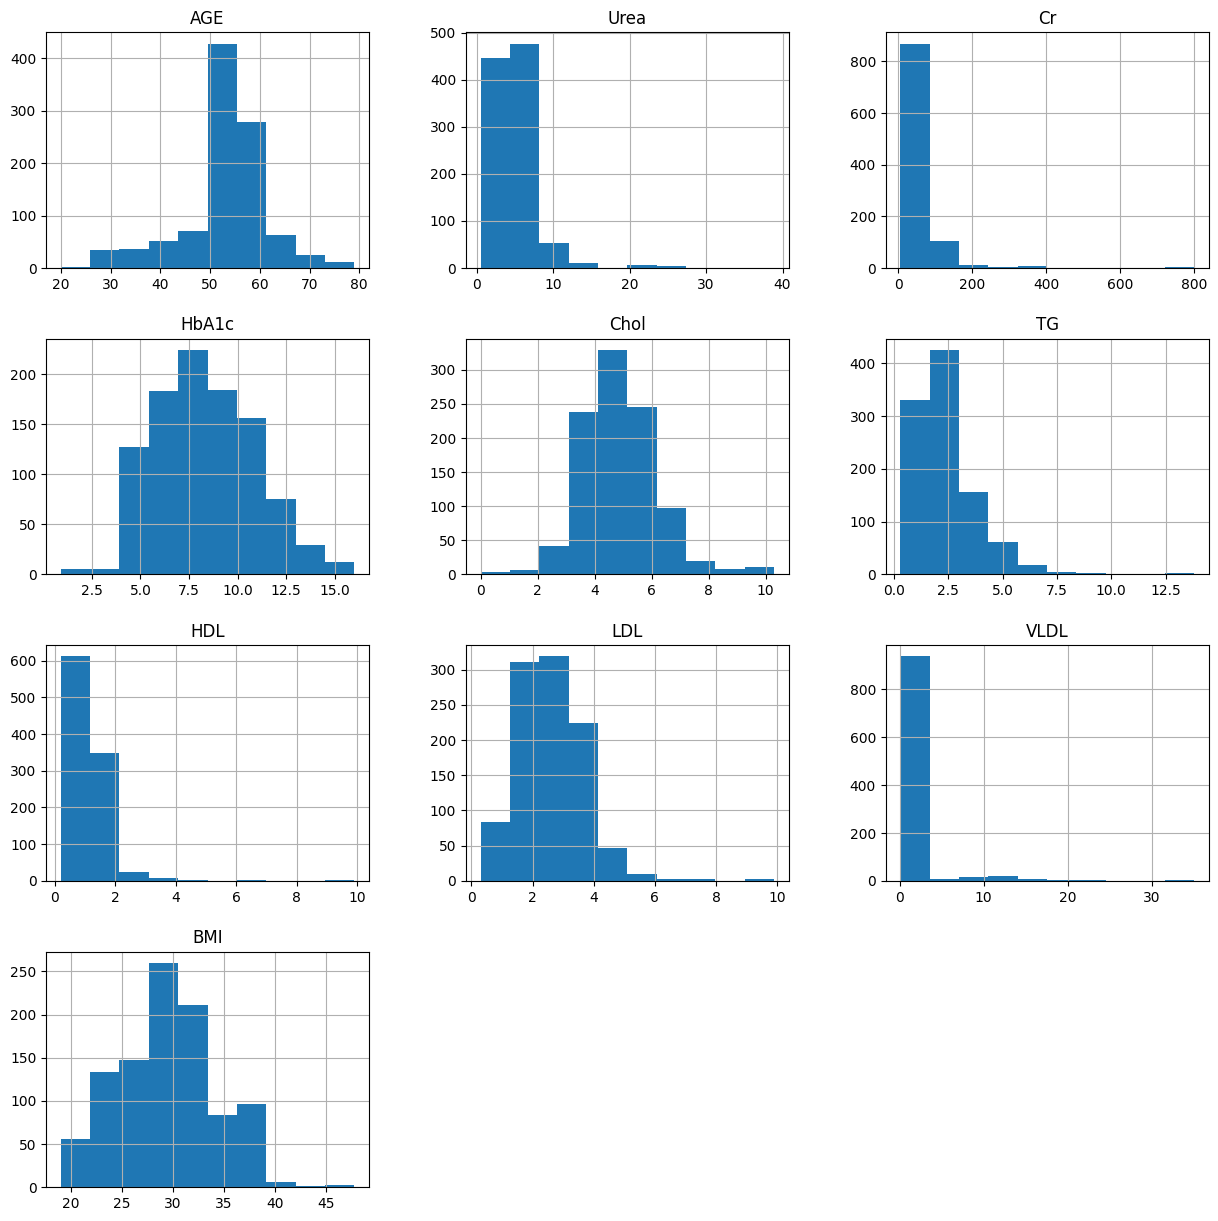

In [154]:
df.hist(figsize = (15,15), column=['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'])
plt.show()

## 3.3 Heatmap

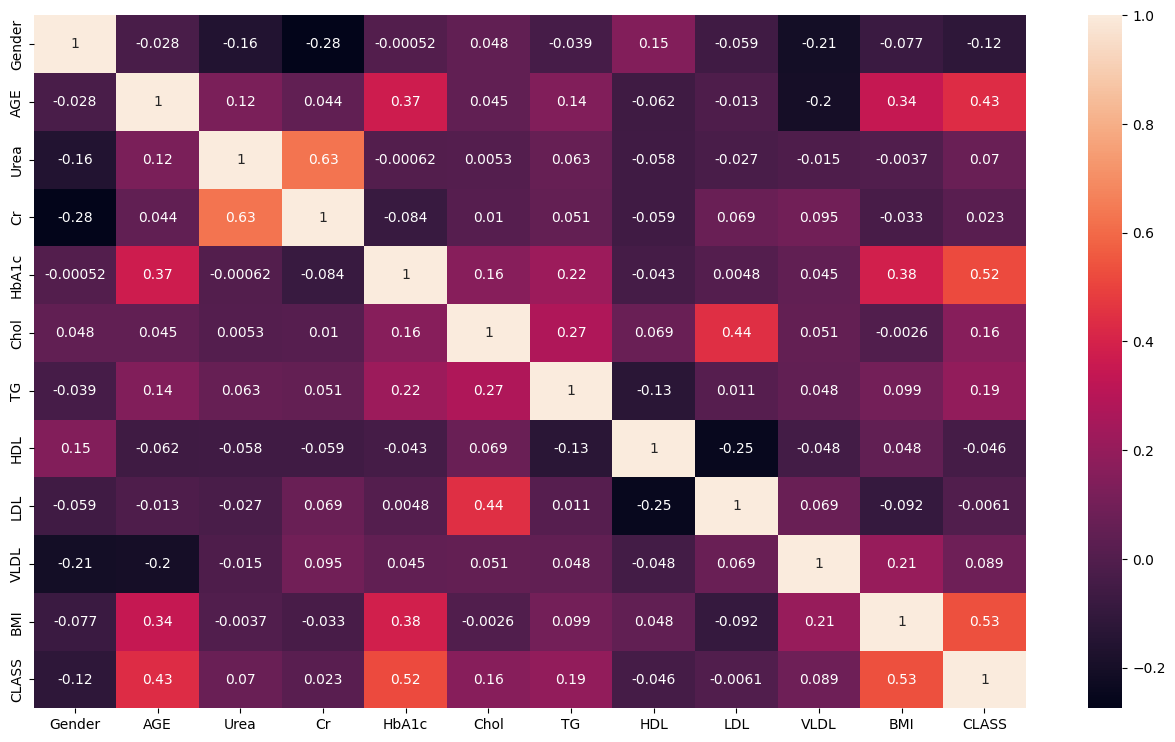

In [155]:
plt.figure(figsize=(16,9))
sns.heatmap(df_cleaned[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG','HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']].corr(), annot=True);

## 3.4 Pairplot

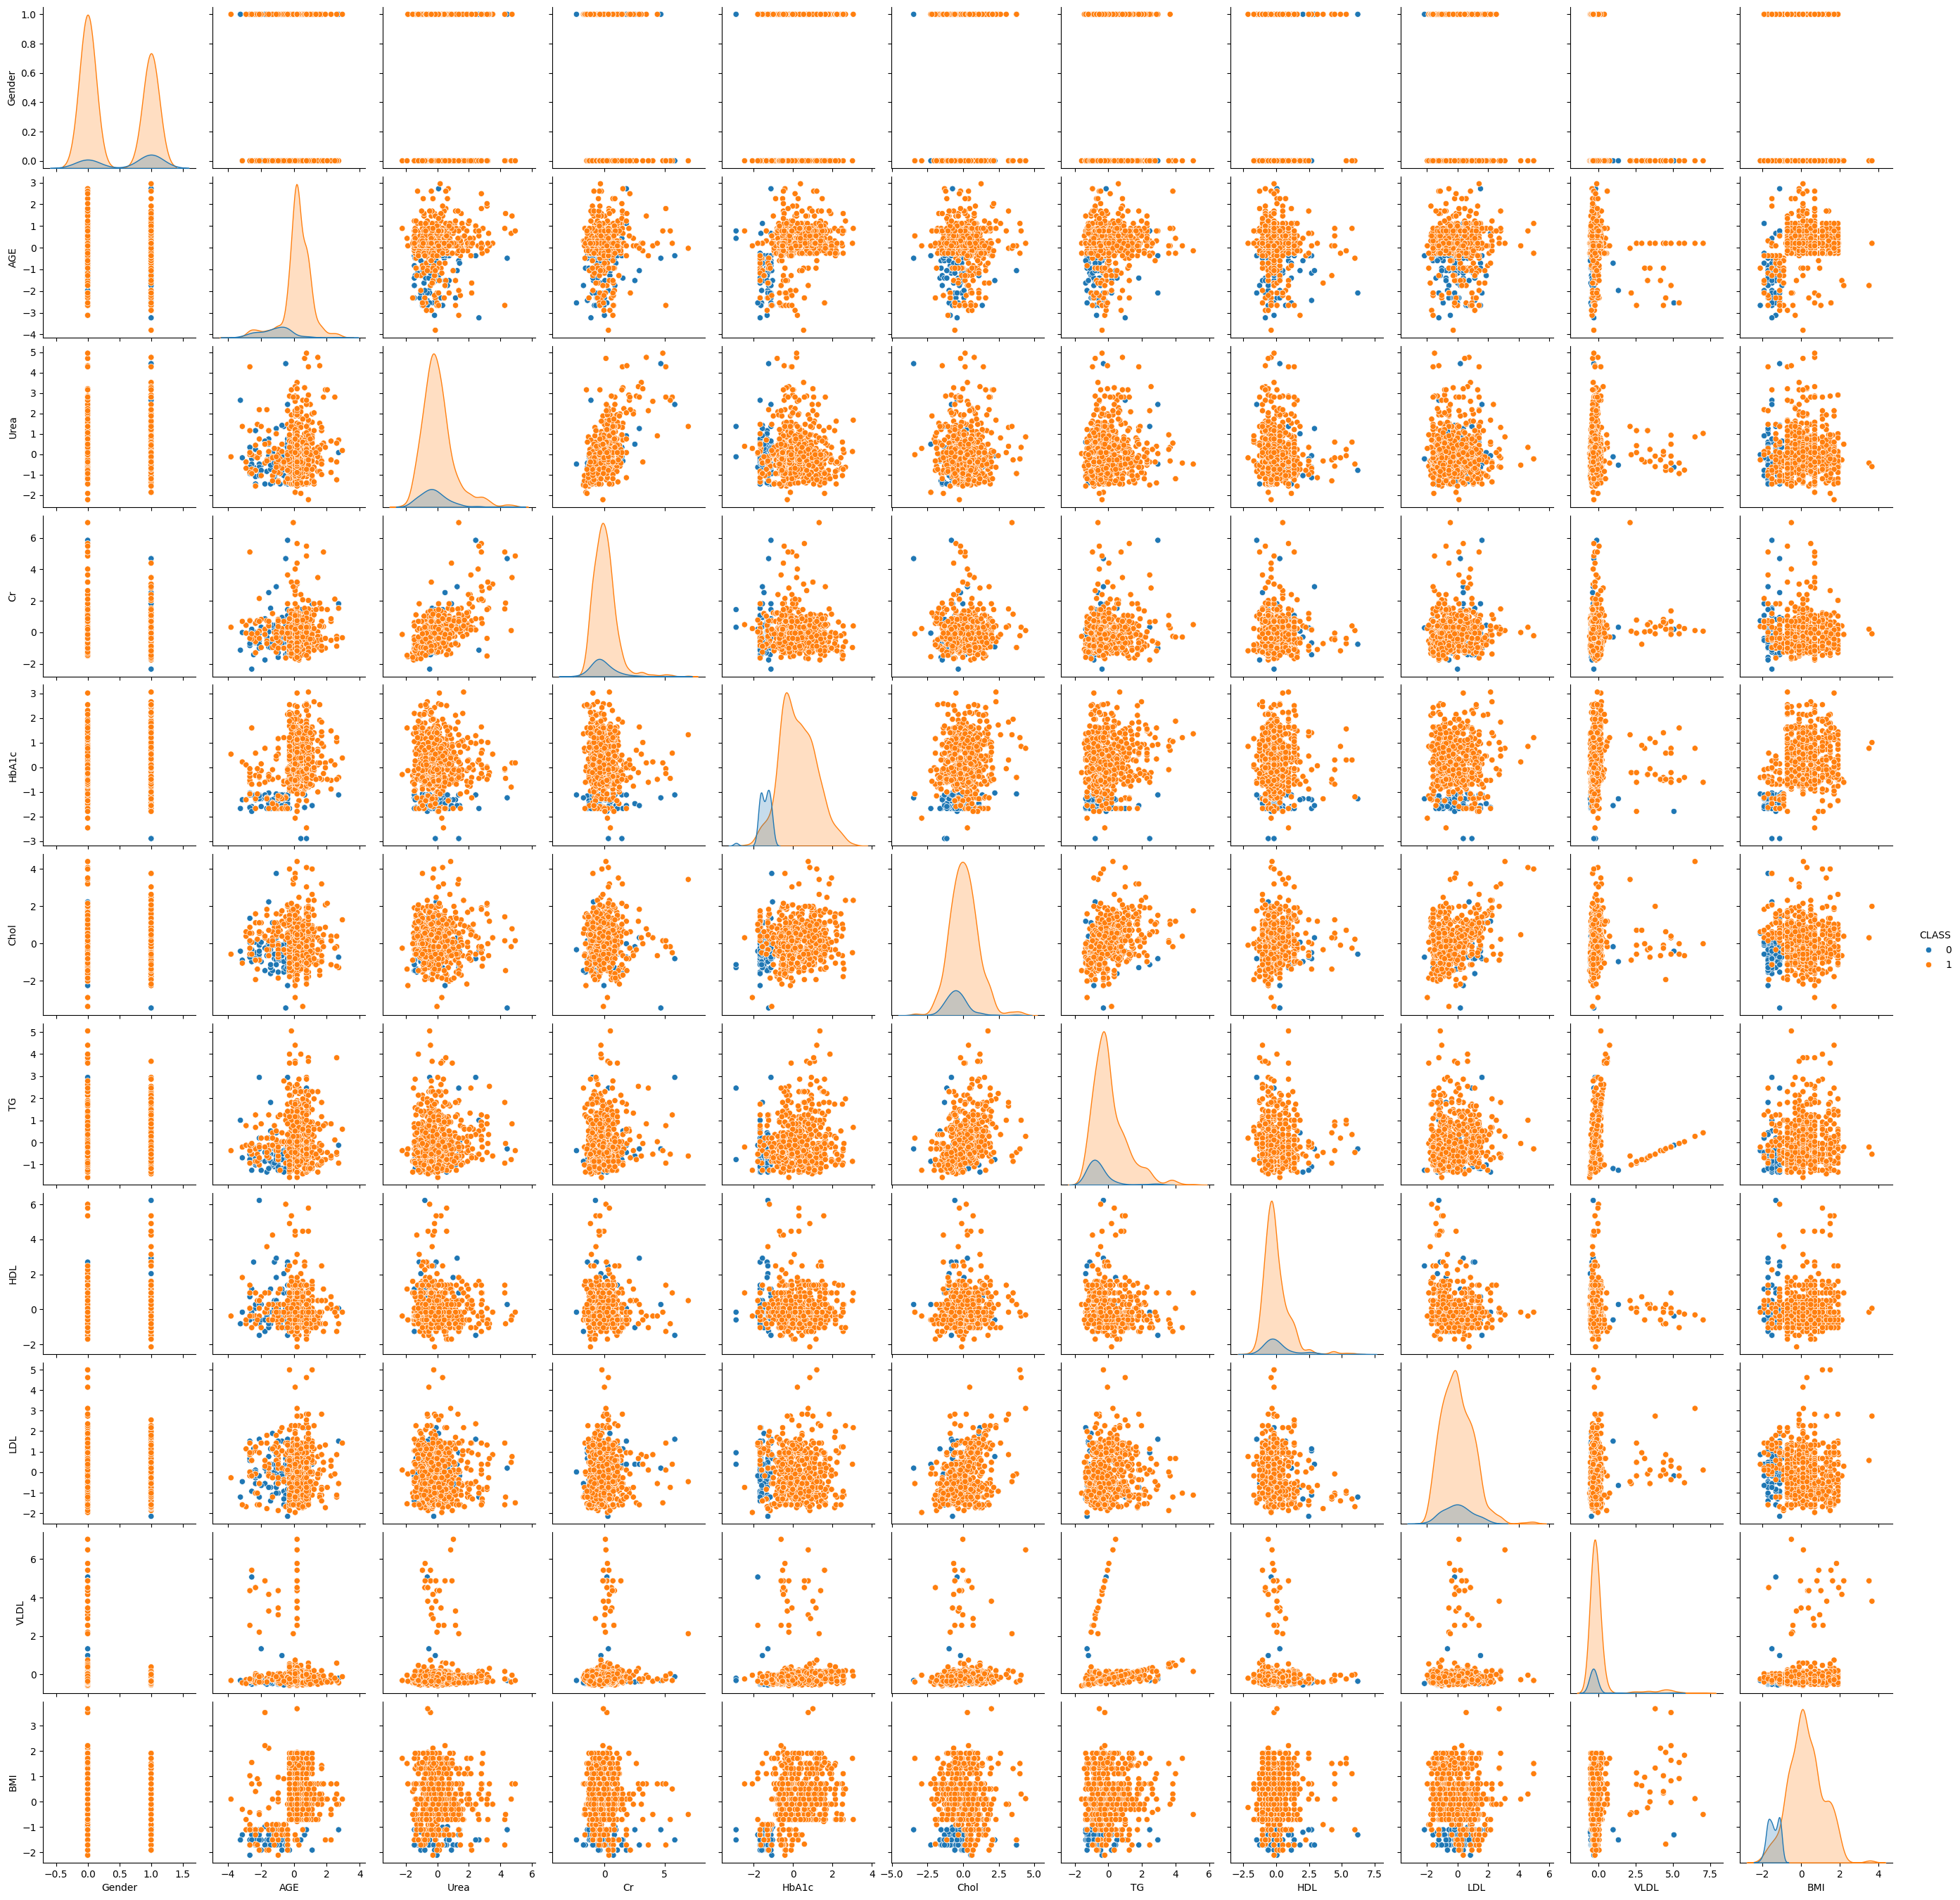

In [156]:
sns.pairplot(data = df_cleaned[['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG','HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']], hue = 'CLASS' )
plt.show()